# Importing Libraries

Importing libraries is an essential step in any data analysis or machine learning project. These libraries provide various functions and tools to manipulate, visualize, and analyze data efficiently. Here are explanations of some popular data analysis libraries:

Pandas: Pandas is a powerful and widely used library for data manipulation and analysis. It provides data structures like DataFrames and Series, which allow you to store and manipulate tabular data. Pandas offers a wide range of functions for data cleaning, filtering, aggregation, merging, and more.

NumPy: NumPy (Numerical Python) is a fundamental library for scientific computing in Python. It provides efficient data structures like arrays and matrices and a vast collection of mathematical functions. NumPy enables you to perform various numerical operations on large datasets, such as element-wise calculations, linear algebra, Fourier transforms, and random number generation.

Matplotlib: Matplotlib is a popular plotting library that enables you to create a wide range of static, animated, and interactive visualizations. It provides a MATLAB-like interface and supports various types of plots, including line plots, scatter plots, bar plots, histograms, and more. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing MNIST Dataset From keras.datasets

In [3]:
from tensorflow.keras.datasets import mnist

# Splitting Dataset

Splitting a dataset is the process of dividing it into separate subsets for training, validation, and testing. Here's a the common ways to split a dataset:

Train-Test Split: In some cases, a separate validation set may not be necessary. Instead, the dataset is split into a training set and a test set only. The training set is used for model training, and the test set is used for final model evaluation. The split ratio is usually around 80-90% for training and 10-20% for testing.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

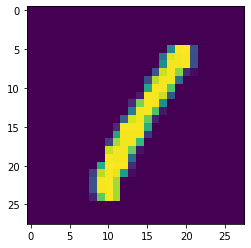

In [6]:
plt.imshow(x_train[3])

In [7]:
x_train.min()

0

In [8]:
x_train.max()

255

In [9]:
x_train = x_train / 255
x_test = x_test / 225

# Importing Deep Learning Libraries

Importing deep learning libraries allows you to access and utilize their functionalities and APIs for building, training, and evaluating deep learning models. Here's a of some popular deep learning libraries:

TensorFlow: TensorFlow is an open-source deep learning library developed by Google. It provides a flexible and comprehensive ecosystem for building and training various types of neural networks. TensorFlow uses a symbolic dataflow graph to define and execute computational operations, making it efficient for both research and production use cases

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

# Building Encoder Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

To build an encoder model, you can use a convolutional neural network (CNN) architecture. The encoder's role is to extract relevant features from the input data.

In [14]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28, 28]))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

# Building Decoder Model

In [16]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(28*28, activation = 'sigmoid'))
decoder.add(Reshape([28, 28]))

In [17]:
autoencoder = Sequential([encoder, decoder])

# Compiling Model

Compiling a model in deep learning involves configuring the training process by specifying the optimizer, loss function, and metrics to be used. The compilation step is necessary before training the model.

In [18]:
autoencoder.compile(optimizer = SGD(lr = 1.5), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training The Model

Training a deep learning model involves iteratively updating the model's parameters or weights using a training dataset. The process aims to minimize the loss function by adjusting the model's parameters through an optimization algorithm.

In [20]:
autoencoder.fit(x_train,
                x_train, 
                validation_data = (x_test, x_test),
                epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 48s 22ms/step - loss: 0.2538 - accuracy: 0.0834 - val_loss: 0.2300 - val_accuracy: 0.1064
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2004 - accuracy: 0.1408 - val_loss: 0.1867 - val_accuracy: 0.1515
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1675 - accuracy: 0.1821 - val_loss: 0.1371 - val_accuracy: 0.1949
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1515 - accuracy: 0.2048 - val_loss: 0.1280 - val_accuracy: 0.2128
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1428 - accuracy: 0.2178 - val_loss: 0.1153 - val_accuracy: 0.2222
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1365 - accuracy: 0.2266 - val_loss: 0.1083 - val_accuracy: 0.2190
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1313 - accuracy: 0.2345 - val_loss: 0.1037 -

In [21]:
loss = pd.DataFrame(autoencoder.history.history)

<AxesSubplot:>

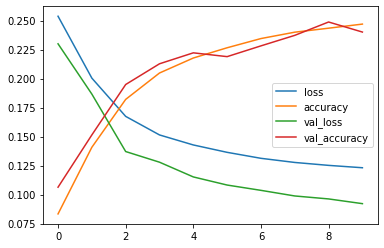

In [22]:
loss.plot()

# Predicting on dataset

In [23]:
encoded_image = autoencoder.predict(x_test[:5])

1/1 [==============================] - 1s 562ms/step


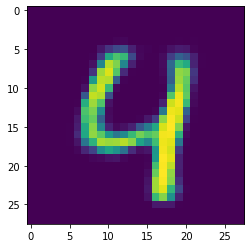

In [25]:
plt.imshow(encoded_image[4])

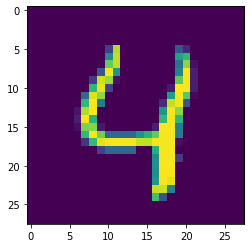

In [26]:
plt.imshow(x_test[4])

# Denoising Images

Gaussian noise, also known as white noise or Gaussian white noise, is a type of random noise that follows a Gaussian distribution. It is characterized by its mean and standard deviation, which determine the center and spread of the distribution, respectively. Gaussian noise is commonly used in various fields, including signal processing and machine learning, for different purposes such as data augmentation, regularization, or modeling uncertainty.

In [28]:
from tensorflow.keras.layers import GaussianNoise

In [29]:
sample = GaussianNoise(0.2)

In [31]:
noisey = sample(x_test[0:2], training = True)

In [32]:
noisey

<tf.Tensor: shape=(2, 28, 28), dtype=float32, numpy=
array([[[-0.30564865,  0.02565729, -0.1192122 , ..., -0.5578154 ,
         -0.0221911 ,  0.27747524],
        [ 0.18239322,  0.16188784,  0.03723134, ...,  0.12992612,
          0.26944754,  0.1251676 ],
        [ 0.18285845,  0.0812341 ,  0.21501994, ..., -0.07960781,
         -0.14415126, -0.12916797],
        ...,
        [ 0.24536704,  0.23620653,  0.06100739, ..., -0.29674038,
         -0.24893601,  0.27954087],
        [-0.3580623 ,  0.25139275,  0.09399603, ...,  0.3033813 ,
         -0.06592827,  0.19079114],
        [ 0.27074414,  0.28805283,  0.09576111, ...,  0.00521929,
          0.08494842, -0.24725862]],

       [[ 0.05969985, -0.05036345, -0.39475965, ..., -0.16205858,
         -0.31321442,  0.1485771 ],
        [ 0.07418235, -0.10905349, -0.04191795, ..., -0.20208135,
          0.07315882,  0.00589004],
        [-0.20127232,  0.02933077,  0.21194677, ...,  0.35620245,
         -0.01737065,  0.14720605],
        ...,
 

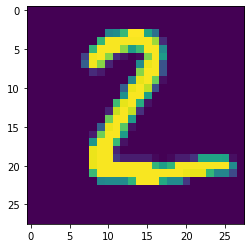

In [38]:
plt.imshow(x_test[1])

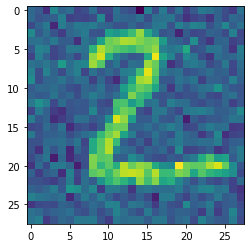

In [39]:
plt.imshow(noisey[1])